In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df =pd.read_csv("http://51.91.120.89/extras/iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [5]:
df["class_value"] = df["class"].map({
    "Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2
})
df

,sepallength,sepalwidth,petallength,petalwidth,class,class_value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

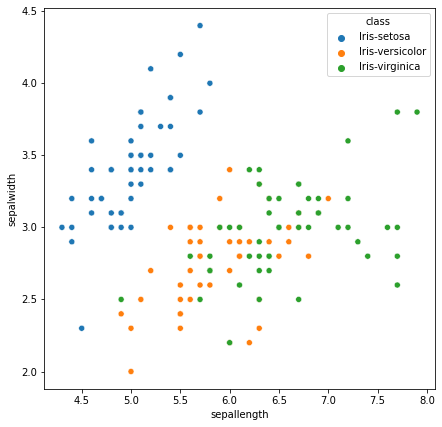

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

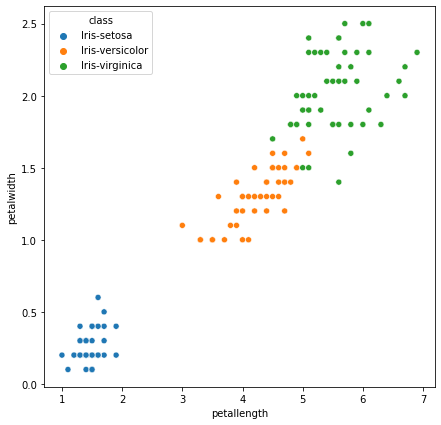

In [7]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class")


In [8]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class',
       'class_value'],
      dtype='object')

<AxesSubplot:>

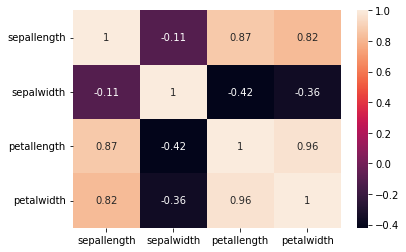

In [9]:
sns.heatmap( df.iloc[: , :4].corr() , annot=True)

In [10]:
#!pip install mlxtend
#!pip install dtreeplt

In [11]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from dtreeplt import dtreeplt

In [15]:
#X = df[ ["sepallength","sepalwidth"] ]
X = df[ ["petallength","petalwidth"] ]
y = df.class_value

In [18]:
model = RandomForestClassifier(max_depth=11, n_estimators=50, random_state=0)
model.fit(X, y)
model.score(X, y)

0.9933333333333333

C:\Users\kurs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

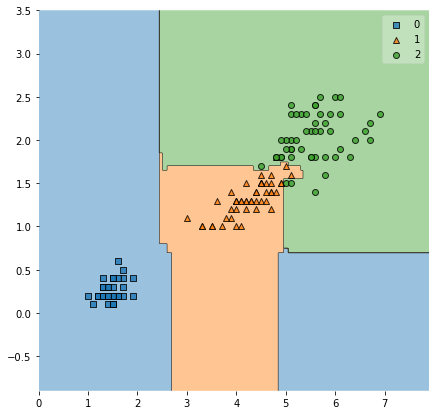

In [19]:
plt.figure(figsize=(7,7))
plot_decision_regions(X.values, y.values, model)

### Porównianie z reg. log. odnośnie zachorowań na cukrzycę

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("../Dzien07/cukrzyca.csv")

In [24]:
X = df.iloc[: , :-1]
y = df.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(max_depth=15, random_state=0)
model.fit(X_train, y_train)
print("TEST:", model.score(X_test, y_test))
print("TRAIN:", model.score(X_train, y_train))

TEST: 0.9285714285714286
TRAIN: 1.0


In [25]:
y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1
0,199,14
1,8,87


In [26]:
pd.DataFrame( model.feature_importances_ , X.columns).sort_values(0)

,0
pregnancies,0.074453
skinthickness,0.076011
bloodpressure,0.085137
insulin,0.089509
diabetespedigreefunction,0.123552
age,0.134542
bmi,0.159735
glucose,0.257062
